<a href="https://colab.research.google.com/github/ArtemBurenok/Machine_Learning_Course/blob/main/Multiclass__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import time

In [ ]:
warnings.filterwarnings('ignore')

 **Задание 1.**

Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.



Для анализа были взяты данные из предыдущего дз (кредитный скоринг). Целевая переменная - колонка STATUS в таблице CreditRecord. Метки целевой переменной: C, 0, X, 1, 5, 2, 3, 4.

In [ ]:
CreditRecord = pd.read_csv('/content/drive/MyDrive/credit_record.csv')
appRecord = pd.read_csv('/content/drive/MyDrive/application_record.csv')

In [ ]:
CreditRecord.shape, appRecord.shape

((1048575, 3), (438557, 18))

In [ ]:
CreditRecord.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
appRecord.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


**Задание 2.**

Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

Первичный анализ

In [ ]:
CreditRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
appRecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Для начала, посмотрим на уникальные значения столбцов.

In [ ]:
bar_group = []

for column in appRecord.columns:
    if column != 'AMT_INCOME_TOTAL':
        if len(pd.unique(appRecord[column])) < 30 :
            bar_group.append(column)
            print(pd.unique(appRecord[column]))

['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7  9 12  6]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[1]
[1 0]
[0 1]
[0 1]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


Посмотрим на уникальные значения целевой переменной.

In [ ]:
CreditRecord['STATUS'].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
# количество пропущенных значений
appRecord.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Сделаем первичный анализ.

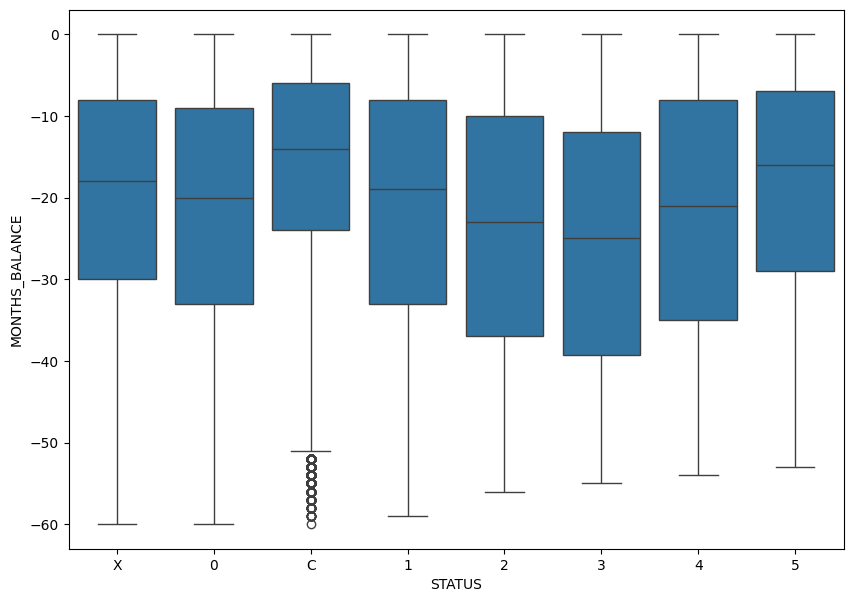

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=CreditRecord['STATUS'], y=CreditRecord['MONTHS_BALANCE']);

In [ ]:
len(bar_group)

14

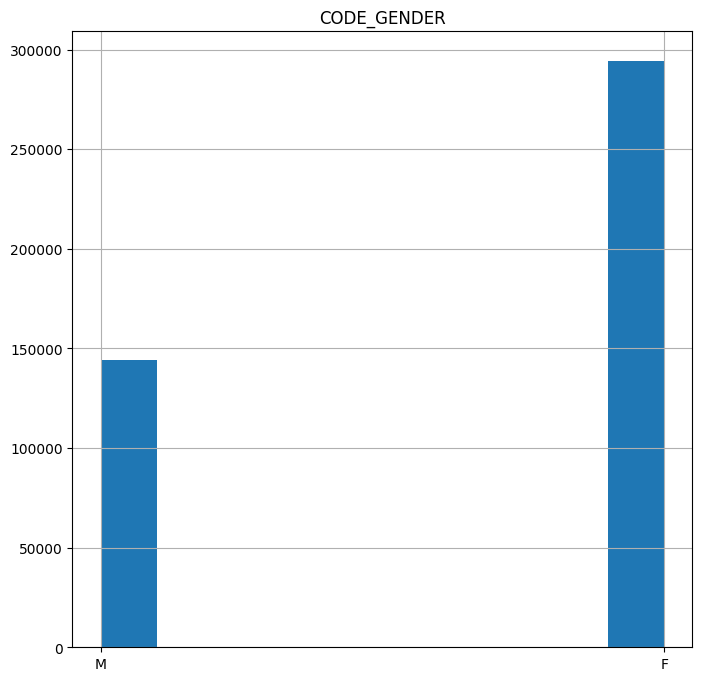

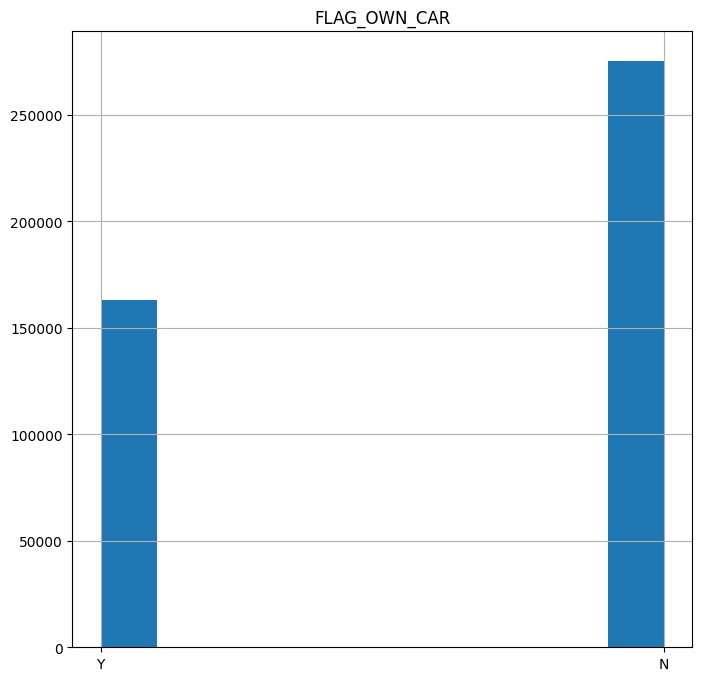

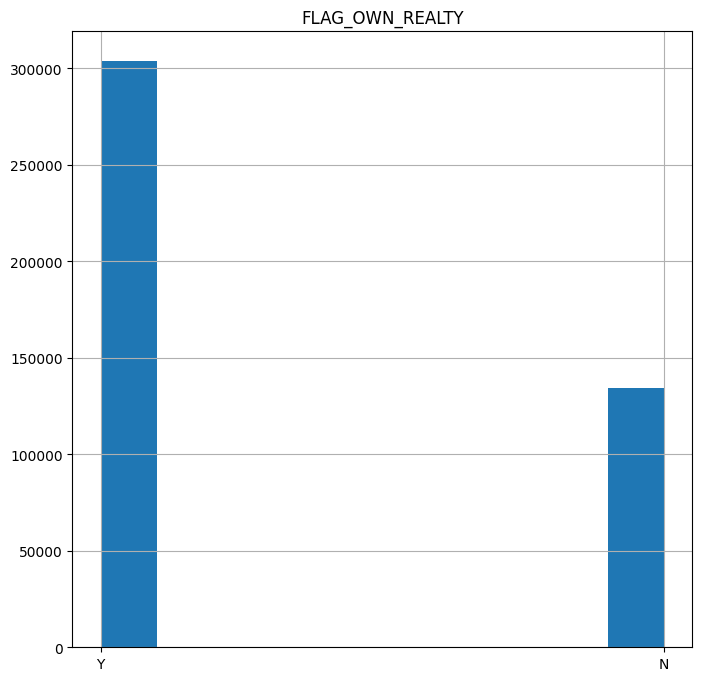

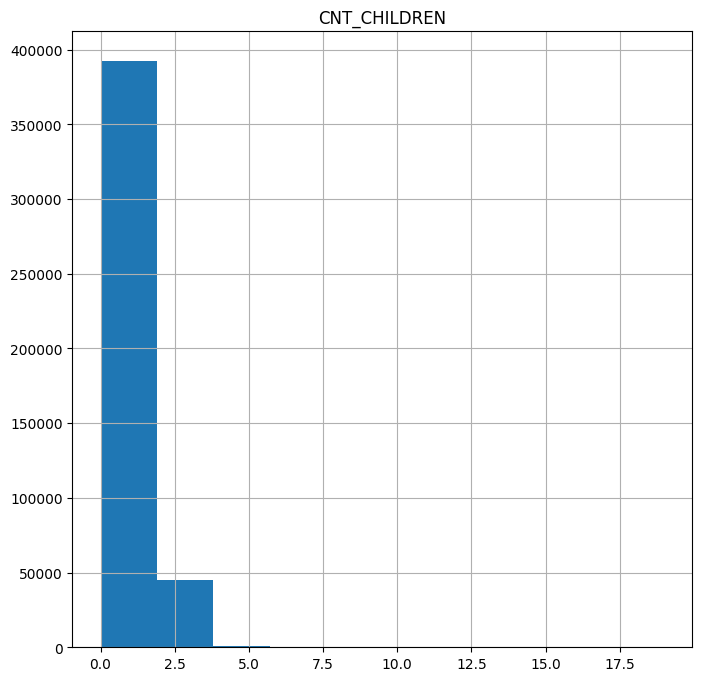

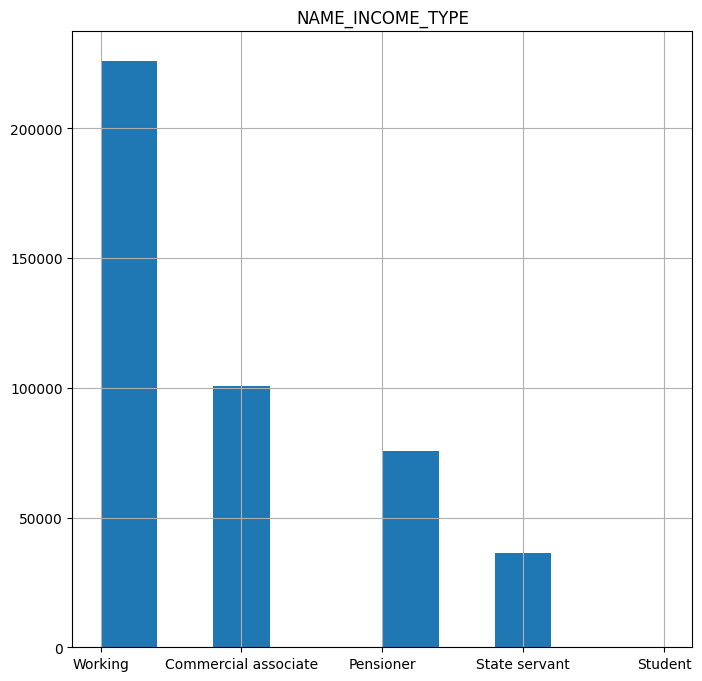

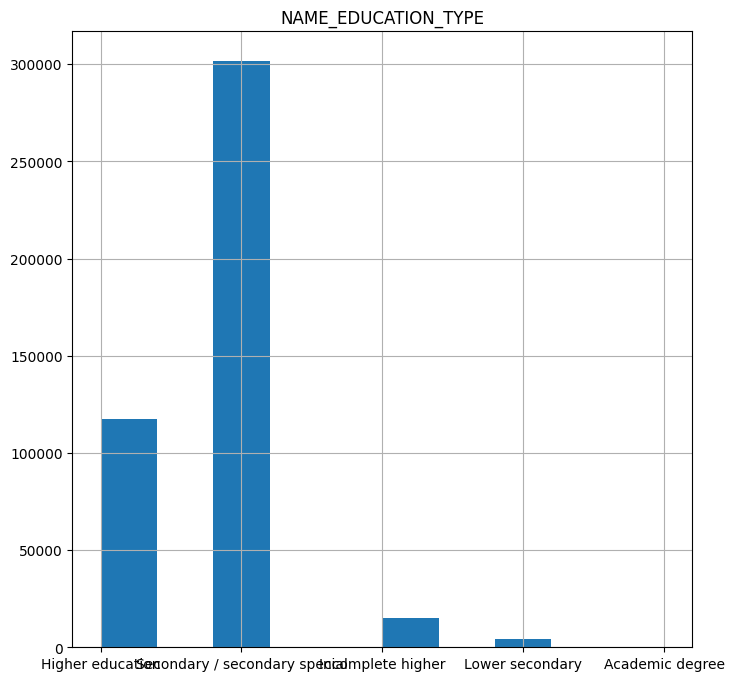

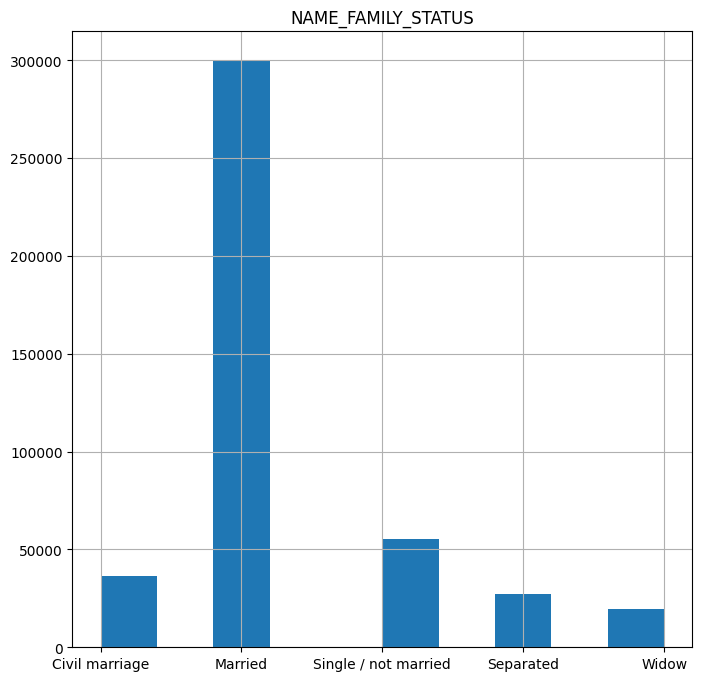

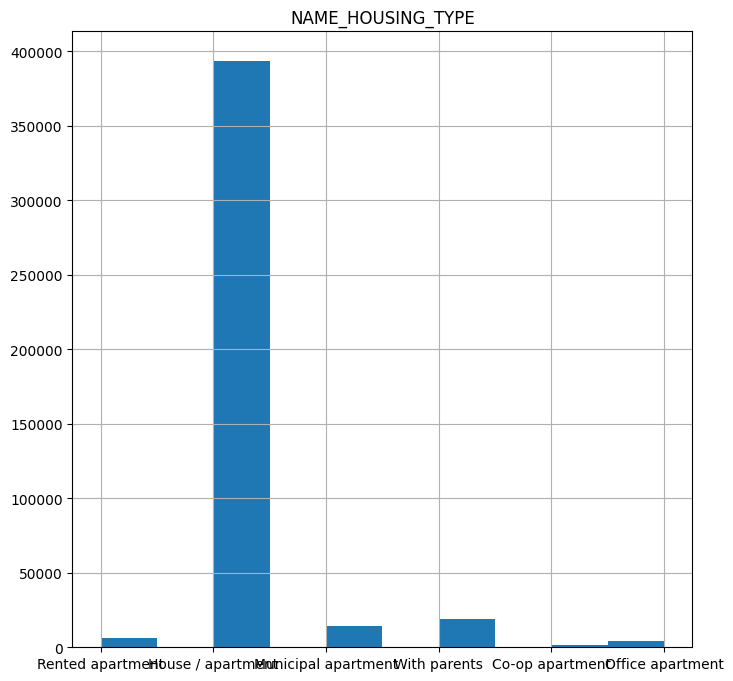

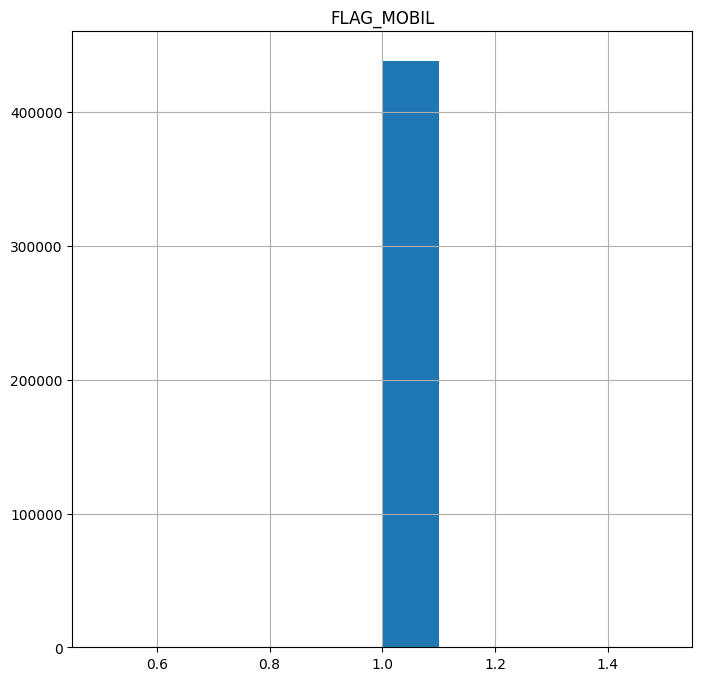

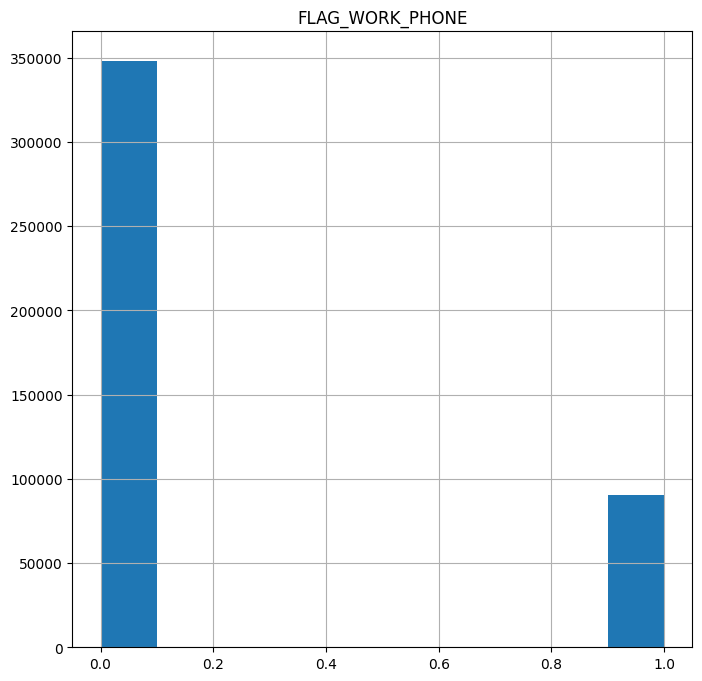

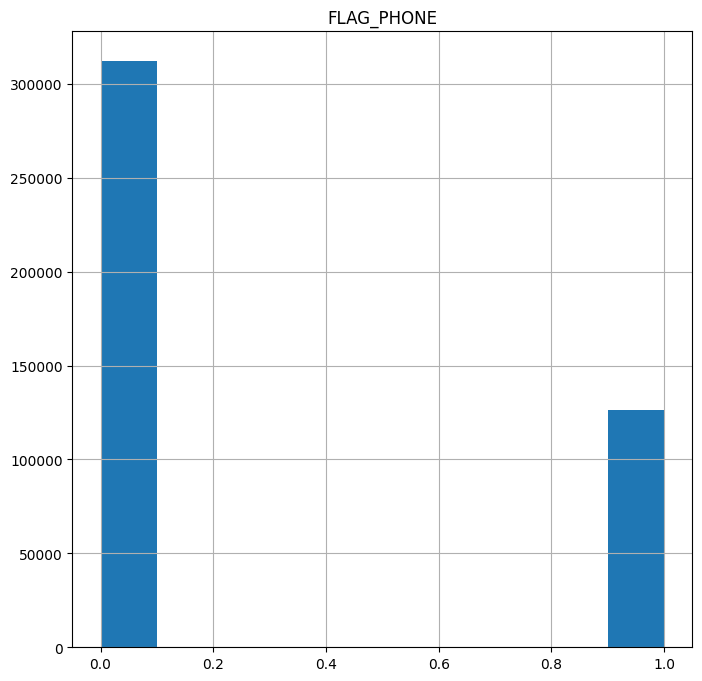

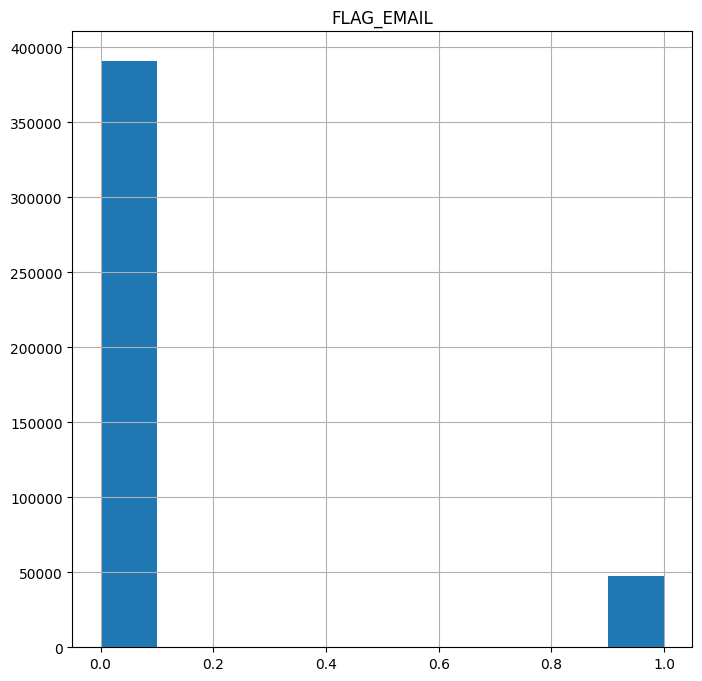

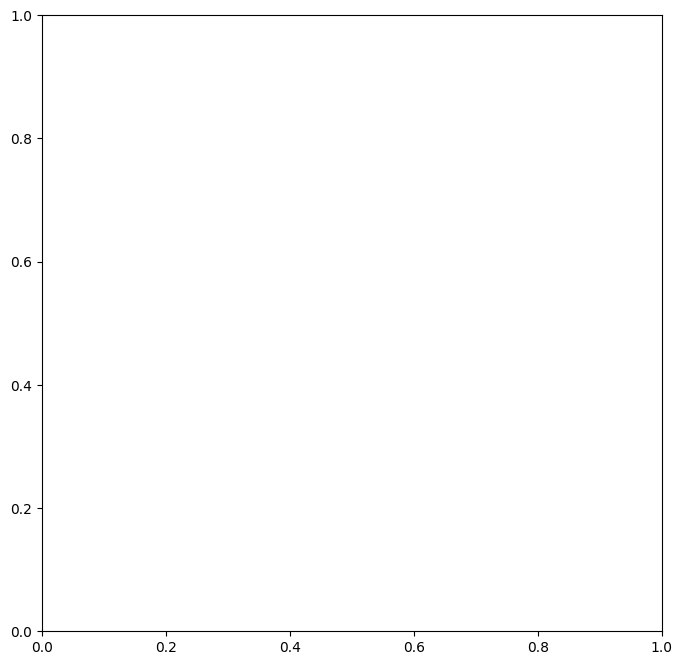

In [ ]:
for i in range(len(bar_group) - 1):
    try:
        plt.figure(figsize=(8, 8))
        plt.hist(appRecord[bar_group[i]])
        plt.title(bar_group[i])
        plt.grid()
        plt.show()
    except TypeError:
        continue

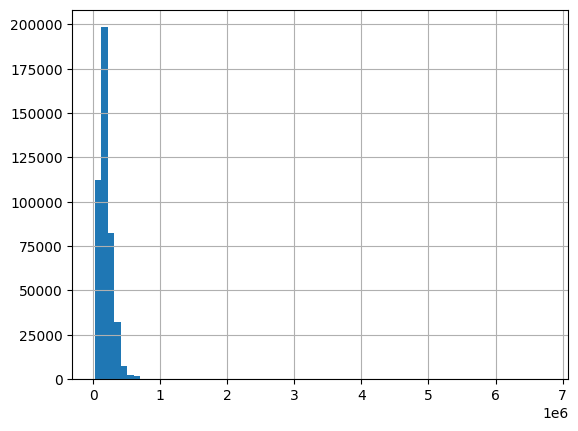

In [ ]:
plt.hist(appRecord['AMT_INCOME_TOTAL'], bins=70)
plt.grid()
plt.show()

**Задание 3.**

При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

objectColumns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

for objColumn in objectColumns:
    label = LabelEncoder()
    appRecord[objColumn] = label.fit_transform(appRecord[objColumn].values)

In [ ]:
Ocupation_dict = {
    'Security staff':0, 'Sales staff':1,
    'Accountants':2, 'Laborers':3,
    'Managers':4,'Drivers':5,
    'Core staff':6, 'High skill tech staff':7,
    'Cleaning staff':8,'Private service staff':9,
    'Cooking staff':10, 'Low-skill Laborers':11,
    'Medicine staff':12, 'Secretaries':13,
    'Waiters/barmen staff':14, 'HR staff':15,
    'Realty agents':16, "IT staff":17
}

appRecord['OCCUPATION_TYPE'] = appRecord['OCCUPATION_TYPE'].map(Ocupation_dict)

In [ ]:
appRecord.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True, axis=1)

In [ ]:
CreditRecord['STATUS'].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
df_credit = appRecord.merge(CreditRecord, how='inner', on=['ID'])
df_credit.drop('ID', axis=1, inplace=True)
df_credit.head(6)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,0,C
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-1,C
2,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-2,C
3,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-3,C
4,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-4,C
5,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-5,C


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_credit_imputer = imputer.fit_transform(df_credit.values)

Уберём ненужные признаки

In [ ]:
X_data = pd.DataFrame(df_credit_imputer, columns=df_credit.columns)
X_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,3.0,2.0,0,C
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,3.0,2.0,-1,C
2,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,3.0,2.0,-2,C
3,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,3.0,2.0,-3,C
4,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,3.0,2.0,-4,C


Обрежем выборку, чтобы повысить скорость обучения

In [ ]:
X_data = X_data.iloc[:200000]

In [ ]:
X_data['STATUS'].value_counts()

,count
STATUS,
C,83421
0,76477
X,37908
1,1988
5,115
2,61
3,19
4,11


In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
X, y = X_data.drop(['STATUS'], axis=1), X_data['STATUS']

In [ ]:
f_statistic, p_value = f_classif(X, y)

In [ ]:
importance_list = []

for i in range(len(X.columns)):
    if p_value[i] < 0.05:
        importance_list.append(X.columns[i])
        print(f"Признак {X.columns[i]} значим")
    else:
        print(f"Признак {X.columns[i]} не значим")

Признак CODE_GENDER значим
Признак FLAG_OWN_CAR значим
Признак FLAG_OWN_REALTY значим
Признак CNT_CHILDREN значим
Признак AMT_INCOME_TOTAL значим
Признак NAME_INCOME_TYPE значим
Признак NAME_EDUCATION_TYPE значим
Признак NAME_FAMILY_STATUS значим
Признак NAME_HOUSING_TYPE значим
Признак FLAG_MOBIL не значим
Признак FLAG_WORK_PHONE значим
Признак FLAG_PHONE значим
Признак FLAG_EMAIL значим
Признак OCCUPATION_TYPE значим
Признак CNT_FAM_MEMBERS значим
Признак MONTHS_BALANCE значим


In [ ]:
X_new = X[importance_list]

**Задание 4.**

Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

Разделим выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

## Перейдём к обучению с помощью стратегии OneVsRest.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
metrics_dict, times_dict = {}, {}

#### Logistic Regression

In [ ]:
log_reg_one_rest = OneVsRestClassifier(LogisticRegression(C=0.1))

In [ ]:
start_time = time.time()
croos_val_score_log_reg_one_rest = cross_validate(log_reg_one_rest, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['log_reg'] = croos_val_score_log_reg_one_rest
times_dict['log_reg'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_log_reg_one_rest)}")

Accuracy: 0.4599214285714286


#### KNN

In [ ]:
knn_one_rest = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4))

In [ ]:
start_time = time.time()
croos_val_score_knn_one_rest = cross_validate(knn_one_rest, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['KNN'] = croos_val_score_knn_one_rest
times_dict['KNN'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_knn_one_rest)}")

Accuracy: 0.5894857142857143


#### Naive Bayes

In [ ]:
NB_one_rest = OneVsRestClassifier(GaussianNB())

In [ ]:
start_time = time.time()
croos_val_score_NB_one_rest = cross_validate(NB_one_rest, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['NB'] = croos_val_score_NB_one_rest
times_dict['NB'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_NB_one_rest)}")

Accuracy: 0.4636857142857143


#### Decision Tree

In [ ]:
tree_one_rest = OneVsRestClassifier(DecisionTreeClassifier(max_depth=10))

In [ ]:
start_time = time.time()
croos_val_score_tree_one_rest = cross_validate(tree_one_rest, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['Tree'] = croos_val_score_tree_one_rest
times_dict['Tree'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_tree_one_rest)}")

Accuracy: 0.5276428571428571


#### Результат

In [ ]:
result_metrics, result_times = pd.DataFrame(metrics_dict), pd.DataFrame(times_dict, index=[0])

In [ ]:
result_metrics.head()

,log_reg,KNN,NB,Tree
0,0.460929,0.587714,0.463750,0.527571
1,0.460821,0.589750,0.463429,0.524036
2,0.461107,0.588357,0.464464,0.531179
3,0.460964,0.593000,0.465107,0.530679
4,0.455786,0.588607,0.461679,0.524750


In [ ]:
result_times.head()

,log_reg,KNN,NB,Tree
0,73.156183,121.217299,10.00615,16.187508


## Перейдём к обучению с помощью стратегии OneVsOne

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
metrics_dict, times_dict = {}, {}

#### Logistic Regression

In [ ]:
log_reg_one_rest = OneVsOneClassifier(LogisticRegression(C=0.1))

In [ ]:
start_time = time.time()
croos_val_score_log_reg_one_rest = cross_validate(log_reg_one_rest, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['log_reg'] = croos_val_score_log_reg_one_rest
times_dict['log_reg'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_log_reg_one_rest)}")

Accuracy: 0.4597714285714286


#### KNN

In [ ]:
knn_one = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=4))

In [ ]:
start_time = time.time()
croos_val_score_knn_one = cross_validate(knn_one, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['KNN'] = croos_val_score_knn_one
times_dict['KNN'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_knn_one)}")

Accuracy: 0.5884214285714287


#### Naive Bayes

In [ ]:
NB_one = OneVsOneClassifier(GaussianNB())

In [ ]:
start_time = time.time()
croos_val_score_NB_one = cross_validate(NB_one, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['NB'] = croos_val_score_NB_one
times_dict['NB'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_NB_one)}")

Accuracy: 0.4617785714285715


#### Decision Tree

In [ ]:
tree_one = OneVsOneClassifier(DecisionTreeClassifier(max_depth=10))

In [ ]:
start_time = time.time()
croos_val_score_tree_one = cross_validate(tree_one, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['Tree'] = croos_val_score_tree_one
times_dict['Tree'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_tree_one)}")

Accuracy: 0.5103214285714286


#### Результат

In [ ]:
result_metrics, result_times = pd.DataFrame(metrics_dict), pd.DataFrame(times_dict, index=[0])

In [ ]:
result_metrics.head()

,log_reg,KNN,NB,Tree
0,0.460643,0.590929,0.461429,0.512429
1,0.460250,0.587536,0.461643,0.509357
2,0.462536,0.588929,0.462643,0.508679
3,0.459714,0.592179,0.463214,0.510464
4,0.455714,0.582536,0.459964,0.510679


In [ ]:
result_times.head()

,log_reg,KNN,NB,Tree
0,61.838547,447.40081,5.877797,11.791098


## Перейдём к обучению с помощью стратегии OutputCode

In [ ]:
from sklearn.multiclass import OutputCodeClassifier

In [ ]:
metrics_dict, times_dict = {}, {}

#### Logistic Regression

In [ ]:
log_reg_output = OutputCodeClassifier(LogisticRegression(C=0.1))

In [ ]:
start_time = time.time()
croos_val_score_log_reg_output = cross_validate(log_reg_output, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['log_reg'] = croos_val_score_log_reg_output
times_dict['log_reg'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_log_reg_output)}")

Accuracy: 0.45759285714285713


#### KNN

In [ ]:
knn_output = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=4))

In [ ]:
start_time = time.time()
croos_val_score_knn_output = cross_validate(knn_output, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['KNN'] = croos_val_score_knn_output
times_dict['KNN'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_knn_output)}")

Accuracy: 0.5848714285714285


#### NaiveBayes

In [ ]:
NB_ouput = OutputCodeClassifier(GaussianNB())

In [ ]:
start_time = time.time()
croos_val_score_NB_output = cross_validate(NB_ouput, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['NB'] = croos_val_score_NB_output
times_dict['NB'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_NB_output)}")

Accuracy: 0.4612142857142857


#### Decision Tree

In [ ]:
tree_output = OutputCodeClassifier(DecisionTreeClassifier(max_depth=10))

In [ ]:
start_time = time.time()
croos_val_score_tree_output = cross_validate(tree_output, X_train, y_train, cv=5, scoring='accuracy')['test_score']
end_tme = time.time()

In [ ]:
metrics_dict['Tree'] = croos_val_score_tree_output
times_dict['Tree'] = end_tme - start_time

In [ ]:
print(f"Accuracy: {np.mean(croos_val_score_tree_output)}")

Accuracy: 0.5245357142857143


#### Результаты

In [ ]:
result_metrics, result_times = pd.DataFrame(metrics_dict), pd.DataFrame(times_dict, index=[0])

In [ ]:
result_metrics.head()

,log_reg,KNN,NB,Tree
0,0.453964,0.588821,0.455179,0.526893
1,0.458143,0.589750,0.462536,0.528643
2,0.459571,0.571429,0.465036,0.532643
3,0.461929,0.593000,0.459143,0.537071
4,0.454357,0.581357,0.464179,0.497429


In [ ]:
result_times.head()

,log_reg,KNN,NB,Tree
0,95.279366,135.230194,11.83516,26.405437


Таким образом, можно сделать вывод, что наилучая модель по точности - KNN со стратегией OneVsOne, однако если учесть фактор времени, то лучшая модель - Decision Tree со стратегией OneVsRest.

**Задание 5, 6.**

Нужно посчитать распределение массы веществ на выходе. По сути, это задача регрессии, однако я свёл её к классификации с несколькими целевыми признаками. В конце я сравнил оба подхода.

[Ссылка на задания](https://colab.research.google.com/drive/1LBTdDPxrWBwJoYx5DmfIGVC_WnTfQVua?usp=sharing)